# Data Investigation - Weather

### Import Data

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [4]:
font = {'size'   : 50}
matplotlib.rc('font', **font)

LABEL_FONT_SIZE = 15
TITLE_FONT_SIZE = 25

## Import Data

In [5]:
print('Loading Weather Data...')

try:
    file_path_slug = '../../../datasets/bayareabikeshare/*_weather_data.csv'
    file_list = glob(file_path_slug)

    weather_import = pd.DataFrame()

    counter = 1
    chunks = []

    for file in file_list:
        for chunk in pd.read_csv(file, chunksize=10000, iterator=True):
            chunk.columns = ['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_TemperatureF', 'Max_Dew_Point_F', 
                             'MeanDew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 
                             'Max_Sea_Level_Pressure_In', 'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In', 
                             'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles', 
                             'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH', 'Precipitation_In', 
                             'Cloud_Cover', 'Events', 'Wind_Dir_Degrees', 'zip']
            chunks.append(chunk)
        print('\tfinished file! (%d of %d)'% (counter, len(file_list)))
        counter += 1

    weather_import = pd.concat(chunks)
    print('Data Loaded Successfully!')
except:
    print('oops... something went wrong loading the data :()')

Loading Weather Data...
	finished file! (1 of 4)
	finished file! (2 of 4)
	finished file! (3 of 4)
	finished file! (4 of 4)
Data Loaded Successfully!


## Preview Imported Data

In [6]:
weather_import.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5495 entries, 0 to 1824
Data columns (total 24 columns):
Date                          5495 non-null object
Max_Temperature_F             5491 non-null float64
Mean_Temperature_F            5491 non-null float64
Min_TemperatureF              5491 non-null float64
Max_Dew_Point_F               5441 non-null float64
MeanDew_Point_F               5441 non-null float64
Min_Dewpoint_F                5441 non-null float64
Max_Humidity                  5441 non-null float64
Mean_Humidity                 5441 non-null float64
Min_Humidity                  5441 non-null float64
Max_Sea_Level_Pressure_In     5494 non-null float64
Mean_Sea_Level_Pressure_In    5494 non-null float64
Min_Sea_Level_Pressure_In     5494 non-null float64
Max_Visibility_Miles          5473 non-null float64
Mean_Visibility_Miles         5473 non-null float64
Min_Visibility_Miles          5473 non-null float64
Max_Wind_Speed_MPH            5494 non-null float64
Mean_Wind_

In [7]:
weather_import.head(5)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,3/1/2014,69.0,62.0,54.0,54.0,48.0,44.0,78.0,63.0,48.0,...,10.0,10.0,17.0,10.0,25.0,0.03,7.0,Rain,108.0,94107
1,3/2/2014,61.0,57.0,53.0,55.0,51.0,47.0,83.0,75.0,67.0,...,9.0,2.0,20.0,9.0,26.0,0.02,6.0,Rain,181.0,94107
2,3/3/2014,61.0,56.0,50.0,52.0,49.0,47.0,89.0,77.0,64.0,...,10.0,9.0,18.0,6.0,28.0,0.1,7.0,Rain,135.0,94107
3,3/4/2014,66.0,61.0,55.0,54.0,52.0,49.0,86.0,77.0,67.0,...,10.0,7.0,17.0,5.0,NaN,T,7.0,Rain,16.0,94107
4,3/5/2014,66.0,60.0,54.0,58.0,54.0,48.0,93.0,73.0,52.0,...,8.0,2.0,20.0,6.0,23.0,0.26,8.0,Rain,211.0,94107


## Clean Data

In [8]:
print('Weather Data Cleanup Started...')

weather_data = weather_import.copy()

# cleanup column names
print('\tcleaning column names')
new_cols = []
for col in weather_data.columns:
    new_cols.append(col.replace(' ', '_').lower())
weather_data.columns = new_cols

# convert end and start dates to datetime objects
print('\tconverting dates to datetime objects')
weather_data['date'] = pd.to_datetime(weather_data['date'], format="%m/%d/%Y")

# extract columns we want to keep
print('\tsubsetting to useful columns')
important_cols = ['date', 'max_temperature_f', 'mean_temperature_f', 'min_temperaturef',
                  'max_wind_speed_mph', 'mean_wind_speed_mph', 'max_gust_speed_mph',
                  'precipitation_in', 'cloud_cover', 'events', 'zip']
weather_data = weather_data[important_cols]

# rename columns
weather_data.columns = ['date', 'max_temp', 'mean_temp', 'min_temp',
                        'max_wind', 'mean_wind', 'max_gust',
                        'precipitation', 'cloud_cover', 'events', 'zip_code']

weather_data.sort_values(by=['date', 'zip_code'], inplace=True)

# cleanup and set date as index
weather_data.set_index('date', inplace=True)
weather_data.sort_index(inplace=True)

# cleanup precipitation data to be all float values
weather_data['precipitation'] = pd.to_numeric(weather_data['precipitation'], errors='coerce')
weather_data['precipitation'].fillna(0.0, inplace=True)

print('Weather Data Cleanup complete')
weather_clean = weather_data.copy()

weather_clean.to_csv('../clean_data/weather_cleaned_all.csv', encoding='utf-8')

Weather Data Cleanup Started...
	cleaning column names
	converting dates to datetime objects
	subsetting to useful columns
Weather Data Cleanup complete


In [7]:
weather_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5495 entries, 2013-08-29 to 2016-08-31
Data columns (total 10 columns):
max_temp         5491 non-null float64
mean_temp        5491 non-null float64
min_temp         5491 non-null float64
max_wind         5494 non-null float64
mean_wind        5494 non-null float64
max_gust         4060 non-null float64
precipitation    5495 non-null float64
cloud_cover      5494 non-null float64
events           888 non-null object
zip_code         5495 non-null int64
dtypes: float64(8), int64(1), object(1)
memory usage: 472.2+ KB


In [8]:
weather_clean.head(10)

,max_temp,mean_temp,min_temp,max_wind,mean_wind,max_gust,precipitation,cloud_cover,events,zip_code
date,,,,,,,,,,
2013-08-29,80.0,70.0,64.0,16.0,5.0,16.0,0.0,4.0,NaN,94041
2013-08-29,80.0,71.0,62.0,14.0,6.0,17.0,0.0,5.0,NaN,94063
2013-08-29,74.0,68.0,61.0,23.0,11.0,28.0,0.0,4.0,NaN,94107
2013-08-29,78.0,71.0,64.0,20.0,8.0,23.0,0.0,4.0,NaN,94301
2013-08-29,81.0,72.0,63.0,16.0,7.0,24.0,0.0,4.0,NaN,95113
2013-08-30,87.0,72.0,63.0,15.0,2.0,18.0,0.0,2.0,NaN,94041
2013-08-30,86.0,74.0,62.0,15.0,2.0,17.0,0.0,2.0,NaN,94063
2013-08-30,78.0,69.0,60.0,29.0,13.0,35.0,0.0,2.0,NaN,94107
2013-08-30,84.0,74.0,64.0,20.0,6.0,23.0,0.0,2.0,NaN,94301


### Split Weather by Region

In [1]:
def plot_temperature_range(df_weather, df_median, df_mean, title, x_label='Date', y_label='Temperature (°F)'):
    
    weather_range = df_weather['max_temp'] - df_weather['min_temp']
    weather_r = weather_range.to_frame()
    weather_r.columns=['range']
    
    median_range = df_median['max_temp'] - df_median['min_temp']
    median_r = median_range.to_frame()
    median_r.columns=['range']
    
    mean_range = df_mean['max_temp'] - df_mean['min_temp']
    mean_r = mean_range.to_frame()
    mean_r.columns=['range']
    
    
    ax = mean_r['range'].plot(figsize=(12,6), label='mean_range', color='m')
    median_r['range'].plot(ax=ax, label='median_range', color='k', linestyle=':')
    weather_r['range'].plot(ax=ax, label='range', linestyle='None', marker='.', color='m', alpha=0.1)

    plt.legend(['mean', 'median'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_ylabel('Temperature Difference (°F)')
    ax.set_ylim(0, 40)
    ax.set_title(title, size=TITLE_FONT_SIZE, weight='bold')
    ax.set_xlabel(x_label, size=LABEL_FONT_SIZE, weight='bold')
    ax.set_ylabel(y_label, size=LABEL_FONT_SIZE, weight='bold')
    plt.tight_layout()
    plt.show()
    
    
    ax = df_mean['max_temp'].plot(figsize=(12,6), label='max_rolling', color='r')
    df_mean['mean_temp'].plot(ax=ax, label='mean_rolling', color='k')
    df_mean['min_temp'].plot(ax=ax, label='min_rolling', color='b')

    df_median['max_temp'].plot(ax=ax, label='max_temp', color='r', linestyle=':', alpha=0.75)
    df_median['mean_temp'].plot(ax=ax, label='mean_temp', color='k', linestyle=':', alpha=0.75)
    df_median['min_temp'].plot(ax=ax, label='min_temp', color='b', linestyle=':', alpha=0.75)

    plt.legend(['max', 'mean', 'min'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_ylabel('Temperature (°F)')
    ax.set_ylim(20, 100)
    plt.title('Monthly Mean Temperature', size=TITLE_FONT_SIZE, weight='bold')
    ax.set_xlabel(x_label, size=LABEL_FONT_SIZE, weight='bold')
    ax.set_ylabel(y_label, size=LABEL_FONT_SIZE, weight='bold')
    plt.tight_layout()
    plt.show() 

#### San Francisco Weather

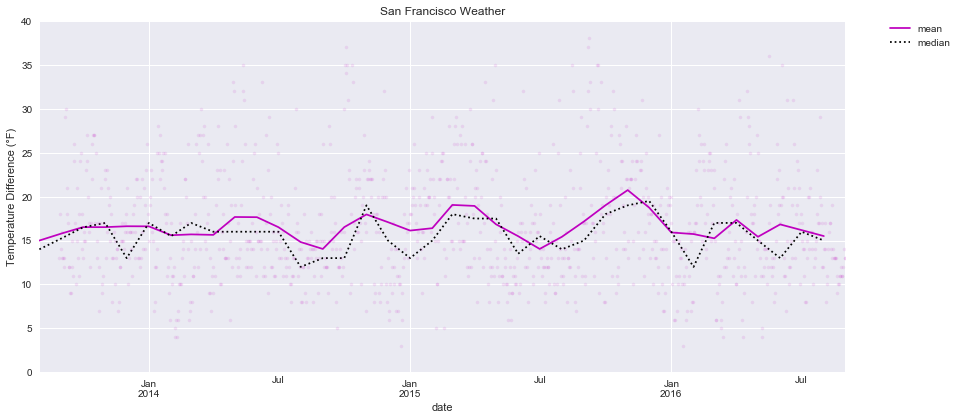

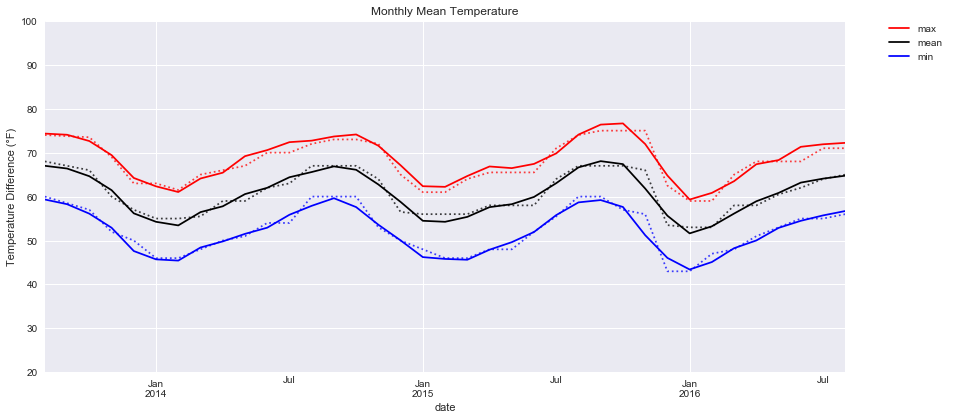

In [10]:
sanFrancisco_weather = weather_clean[weather_clean.zip_code == 94107]
# sanFrancisco_weather.to_csv('../clean_data/weather_cleaned_sanFrancisco.csv', encoding='utf-8')

# resample Mean
sf_weather_monthly_mean = sanFrancisco_weather.resample('M').mean()
sf_weather_monthly_rolling_mean = sanFrancisco_weather.resample('M').mean().fillna(0).rolling(window=3, min_periods=1).mean()

# resample Min
sf_weather_monthly_min = sanFrancisco_weather.resample('M').min()
sf_weather_monthly_rolling_min = sanFrancisco_weather.resample('M').min().fillna(0).rolling(window=3, min_periods=1).min()

# resample Max
sf_weather_monthly_max = sanFrancisco_weather.resample('M').max()
sf_weather_monthly_rolling_max = sanFrancisco_weather.resample('M').max().fillna(0).rolling(window=3, min_periods=1).max()

# resample Median
sf_weather_monthly_median = sanFrancisco_weather.resample('M').median()
sf_weather_monthly_rolling_median = sanFrancisco_weather.resample('M').median().fillna(0).rolling(window=3, min_periods=1).median()

plotRange(sanFrancisco_weather, sf_weather_monthly_rolling_median, sf_weather_monthly_rolling_mean, 'San Francisco Weather')

#### Redwood City Weather

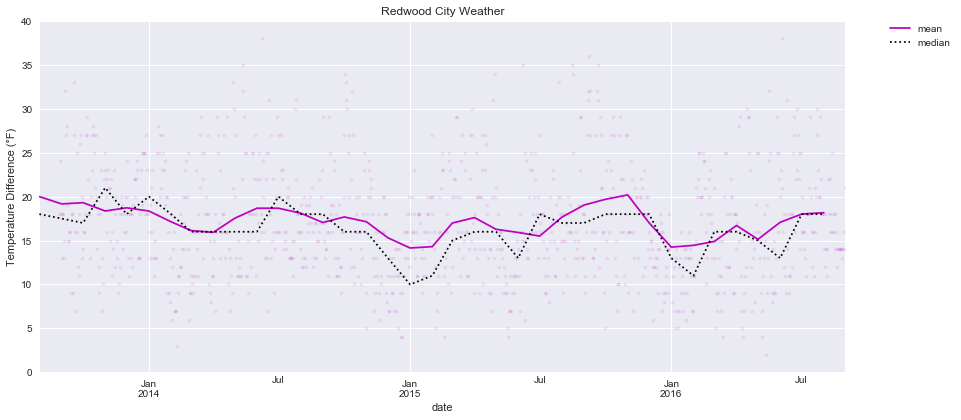

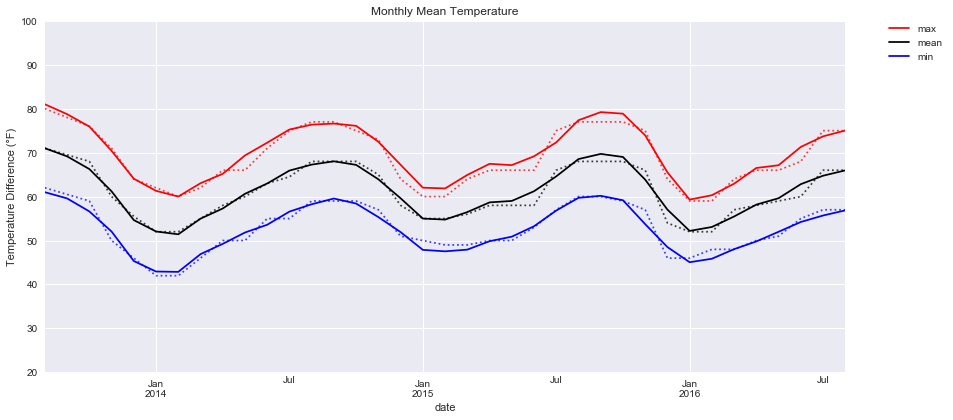

In [11]:
redwoodCity_weather = weather_clean[weather_clean.zip_code == 94063]
redwoodCity_weather.to_csv('../clean_data/weather_cleaned_redwoodCity.csv', encoding='utf-8')

# resample Mean
rc_weather_monthly_mean = redwoodCity_weather.resample('M').mean()
rc_weather_monthly_rolling_mean = redwoodCity_weather.resample('M').mean().fillna(0).rolling(window=3, min_periods=1).mean()

# resample Min
rc_weather_monthly_min = redwoodCity_weather.resample('M').min()
rc_weather_monthly_rolling_min = redwoodCity_weather.resample('M').min().fillna(0).rolling(window=3, min_periods=1).min()

# resample Max
rc_weather_monthly_max = redwoodCity_weather.resample('M').max()
rc_weather_monthly_rolling_max = redwoodCity_weather.resample('M').max().fillna(0).rolling(window=3, min_periods=1).max()

# resample Median
rc_weather_monthly_median = redwoodCity_weather.resample('M').median()
rc_weather_monthly_rolling_median = redwoodCity_weather.resample('M').median().fillna(0).rolling(window=3, min_periods=1).median()

plotRange(redwoodCity_weather, rc_weather_monthly_rolling_median, rc_weather_monthly_rolling_mean, 'Redwood City Weather')

#### Palo Alto Weather

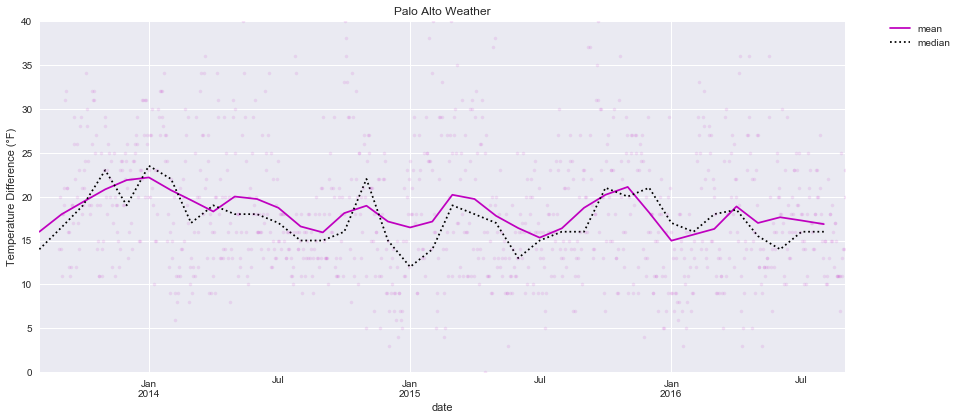

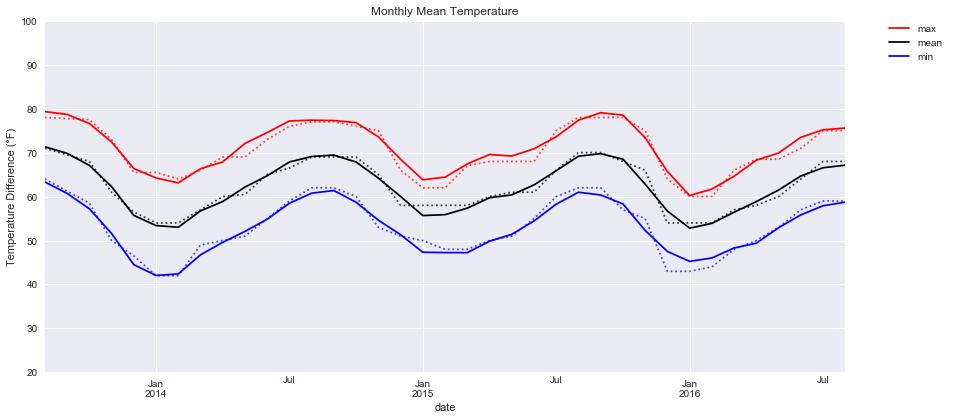

In [12]:
paloAlto_weather = weather_clean[weather_clean.zip_code == 94301]
paloAlto_weather.to_csv('../clean_data/weather_cleaned_paloAlto.csv', encoding='utf-8')

# resample Mean
pa_weather_monthly_mean = paloAlto_weather.resample('M').mean()
pa_weather_monthly_rolling_mean = paloAlto_weather.resample('M').mean().fillna(0).rolling(window=3, min_periods=1).mean()

# resample Min
pa_weather_monthly_min = paloAlto_weather.resample('M').min()
pa_weather_monthly_rolling_min = paloAlto_weather.resample('M').min().fillna(0).rolling(window=3, min_periods=1).min()

# resample Max
pa_weather_monthly_max = paloAlto_weather.resample('M').max()
pa_weather_monthly_rolling_max = paloAlto_weather.resample('M').max().fillna(0).rolling(window=3, min_periods=1).max()

# resample Median
pa_weather_monthly_median = paloAlto_weather.resample('M').median()
pa_weather_monthly_rolling_median = paloAlto_weather.resample('M').median().fillna(0).rolling(window=3, min_periods=1).median()

plotRange(paloAlto_weather, pa_weather_monthly_rolling_median, pa_weather_monthly_rolling_mean, 'Palo Alto Weather')


#### Mountain View Weather

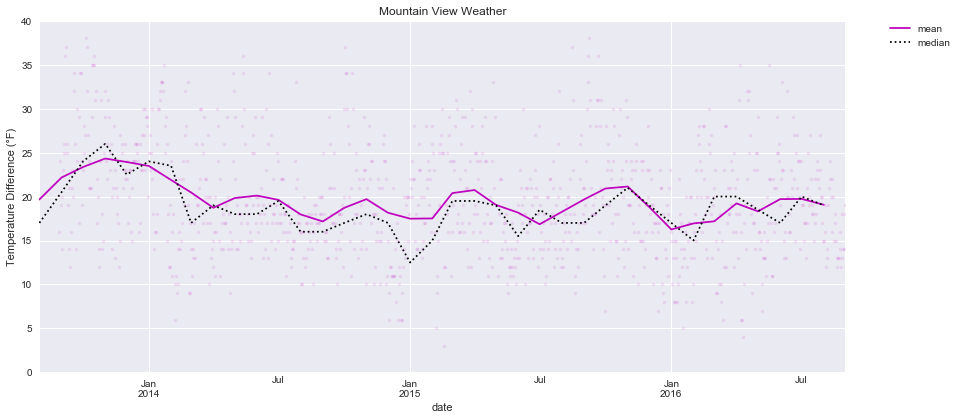

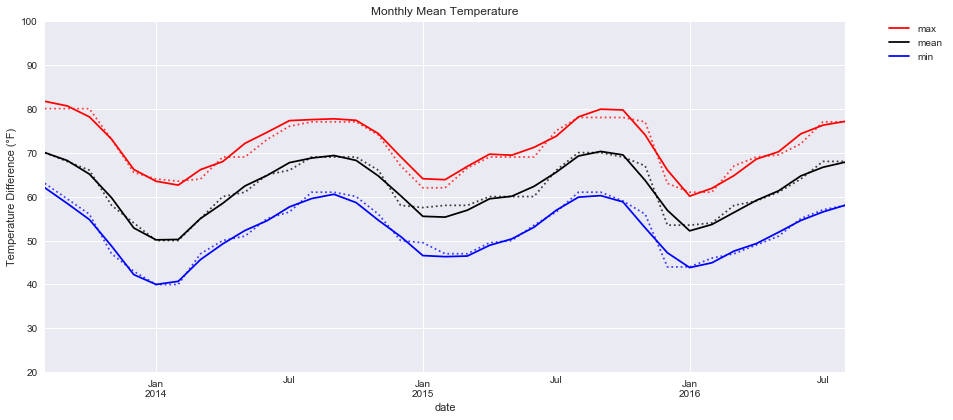

In [13]:
mountainView_weather = weather_clean[weather_clean.zip_code == 94041]
mountainView_weather.to_csv('../clean_data/weather_cleaned_mountainView.csv', encoding='utf-8')

# resample Mean
mv_weather_monthly_mean = mountainView_weather.resample('M').mean()
mv_weather_monthly_rolling_mean = mountainView_weather.resample('M').mean().fillna(0).rolling(window=3, min_periods=1).mean()

# resample Min
mv_weather_monthly_min = mountainView_weather.resample('M').min()
mv_weather_monthly_rolling_min = mountainView_weather.resample('M').min().fillna(0).rolling(window=3, min_periods=1).min()

# resample Max
mv_weather_monthly_max = mountainView_weather.resample('M').max()
mv_weather_monthly_rolling_max = mountainView_weather.resample('M').max().fillna(0).rolling(window=3, min_periods=1).max()

# resample Median
mv_weather_monthly_median = mountainView_weather.resample('M').median()
mv_weather_monthly_rolling_median = mountainView_weather.resample('M').median().fillna(0).rolling(window=3, min_periods=1).median()

plotRange(mountainView_weather, mv_weather_monthly_rolling_median, mv_weather_monthly_rolling_mean, 'Mountain View Weather')


#### San Jose Weather

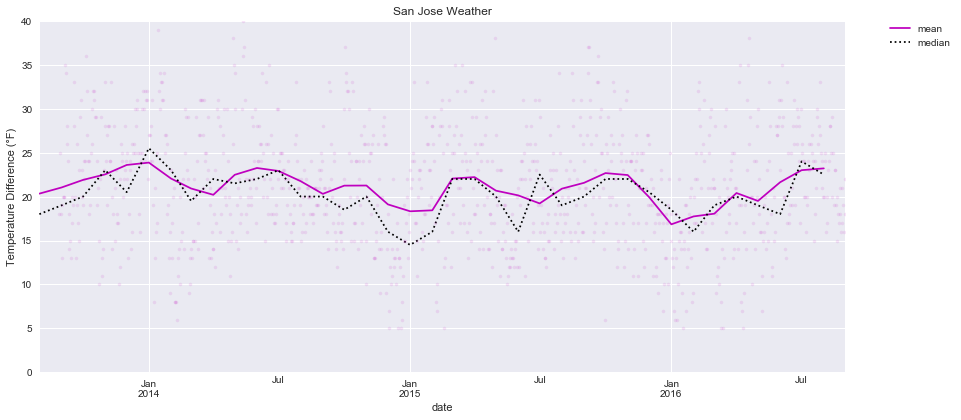

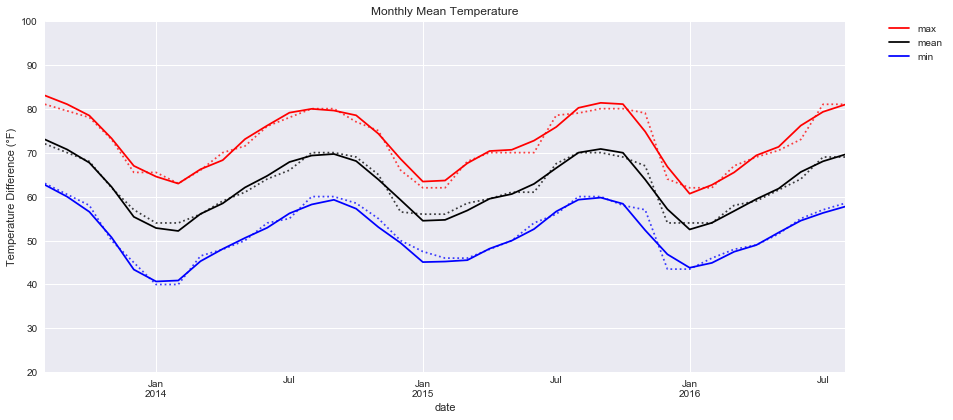

In [14]:
sanJose_weather = weather_clean[weather_clean.zip_code == 95113]
sanJose_weather.to_csv('../clean_data/weather_cleaned_sanJose.csv', encoding='utf-8')

# resample Mean
sj_weather_monthly_mean = sanJose_weather.resample('M').mean()
sj_weather_monthly_rolling_mean = sanJose_weather.resample('M').mean().fillna(0).rolling(window=3, min_periods=1).mean()

# resample Min
sj_weather_monthly_min = sanJose_weather.resample('M').min()
sj_weather_monthly_rolling_min = sanJose_weather.resample('M').min().fillna(0).rolling(window=3, min_periods=1).min()

# resample Max
sj_weather_monthly_max = sanJose_weather.resample('M').max()
sj_weather_monthly_rolling_max = sanJose_weather.resample('M').max().fillna(0).rolling(window=3, min_periods=1).max()

# resample Median
sj_weather_monthly_median = sanJose_weather.resample('M').median()
sj_weather_monthly_rolling_median = sanJose_weather.resample('M').median().fillna(0).rolling(window=3, min_periods=1).median()

plotRange(sanJose_weather, sj_weather_monthly_rolling_median, sj_weather_monthly_rolling_mean, 'San Jose Weather')

## Quick Preview All Weather Data

In [15]:
weather_data.head(5)

,max_temp,mean_temp,min_temp,max_wind,mean_wind,max_gust,precipitation,cloud_cover,events,zip_code
date,,,,,,,,,,
2013-08-29,80.0,70.0,64.0,16.0,5.0,16.0,0.0,4.0,NaN,94041
2013-08-29,80.0,71.0,62.0,14.0,6.0,17.0,0.0,5.0,NaN,94063
2013-08-29,74.0,68.0,61.0,23.0,11.0,28.0,0.0,4.0,NaN,94107
2013-08-29,78.0,71.0,64.0,20.0,8.0,23.0,0.0,4.0,NaN,94301
2013-08-29,81.0,72.0,63.0,16.0,7.0,24.0,0.0,4.0,NaN,95113
